In [1]:
%cd /content/drive/MyDrive/CSE_256_Project

/content/drive/MyDrive/CSE_256_Project


In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df_train = pd.read_csv("./aig_dataset/train.csv")
df_test = pd.read_csv("./aig_dataset/test.csv")

In [4]:
df_train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df_test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [6]:
df_train['text'] = df_train['Title'] + df_train['Description']
df_test['text'] = df_test['Title'] + df_test['Description']

In [7]:
df_train.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [8]:
df_train.head()

,Class Index,Title,Description,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [9]:
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_transform = vectorizer.fit_transform(df_train['text'])
X_test_transform = vectorizer.transform(df_test['text'])

In [10]:
import time

# Start the timer
start_time = time.time()

In [11]:
# build model
model = LogisticRegression(multi_class='ovr')

In [12]:
execution_time = time.time() - start_time
execution_time

0.03685784339904785

In [13]:
# Train the model
model.fit(X_train_transform, df_train['Class Index'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [14]:
y_pred = model.predict(X_test_transform)

In [15]:
accuracy = accuracy_score(df_test['Class Index'], y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9136842105263158


In [16]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(df_test['Class Index'], y_pred)
confusion_mat

array([[1712,   59,   78,   51],
       [  15, 1861,   14,   10],
       [  56,   20, 1664,  160],
       [  48,   21,  124, 1707]])

Text(0.5, 1.0, 'Confusion Matrix')

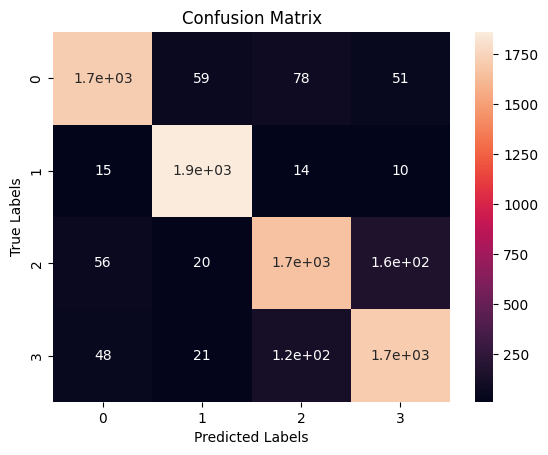

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

In [18]:
# Calculate class-wise accuracy
import numpy as np
class_accuracy = np.diagonal(confusion_mat) / np.sum(confusion_mat, axis=1)
print("class-wise accuracy")
class_accuracy

class-wise accuracy


array([0.90105263, 0.97947368, 0.87578947, 0.89842105])

In [19]:
# Identify misclassified instances
num_classes = len(confusion_mat)

misclassified_instances = []

for i in range(num_classes):
    for j in range(num_classes):
        if i != j and confusion_mat[i, j] > 0:
            misclassified_instances.append((i, j, confusion_mat[i, j]))
misclassified_instances

[(0, 1, 59),
 (0, 2, 78),
 (0, 3, 51),
 (1, 0, 15),
 (1, 2, 14),
 (1, 3, 10),
 (2, 0, 56),
 (2, 1, 20),
 (2, 3, 160),
 (3, 0, 48),
 (3, 1, 21),
 (3, 2, 124)]

In [20]:
# printing misclassified data
wrong_predictions = 0
for idx, _ in enumerate(y_pred):
  if df_test.iloc[idx]['Class Index'] != y_pred[idx]:
    print(df_test.iloc[idx]['text'] + "\n\n")
    wrong_predictions += 1

Prediction Unit Helps Forecast Wildfires (AP)AP - It's barely dawn when Mike Fitzpatrick starts his shift with a blur of colorful maps, figures and endless charts, but already he knows what the day will bring. Lightning will strike in places he expects. Winds will pick up, moist places will dry and flames will roar.


Some People Not Eligible to Get in on Google IPOGoogle has billed its IPO as a way for everyday people to get in on the process, denying Wall Street the usual stranglehold it's had on IPOs. Public bidding, a minimum of just five shares, an open process with 28 underwriters - all this pointed to a new level of public participation. But this isn't the case.


Rivals Try to Turn Tables on Charles SchwabBy MICHAEL LIEDTKE     SAN FRANCISCO (AP) -- With its low prices and iconoclastic attitude, discount stock broker Charles Schwab Corp. (SCH) represented an annoying stone in Wall Street's wing-tipped shoes for decades...


Venezuela Prepares for Chavez Recall VoteSupporters an

In [21]:
# printing wrong predictions
wrong_predictions

656

In [22]:
# common misclassification
common_misclassifications = sorted(misclassified_instances, key=lambda x: x[2], reverse=True)
common_misclassifications

[(2, 3, 160),
 (3, 2, 124),
 (0, 2, 78),
 (0, 1, 59),
 (2, 0, 56),
 (0, 3, 51),
 (3, 0, 48),
 (3, 1, 21),
 (2, 1, 20),
 (1, 0, 15),
 (1, 2, 14),
 (1, 3, 10)]

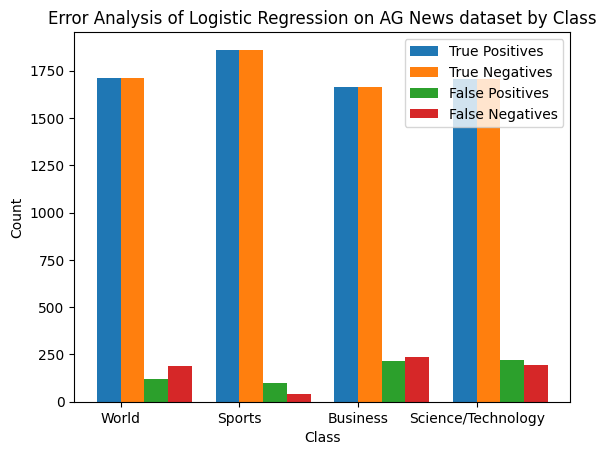

In [23]:
true_positives = np.diag(confusion_mat)
true_negatives = np.sum(confusion_mat) - np.sum(confusion_mat, axis=(0, 1)) + true_positives
false_positives = np.sum(confusion_mat, axis=0) - true_positives
false_negatives = np.sum(confusion_mat, axis=1) - true_positives

# Set the labels for x-axis
labels = ['World', 'Sports', 'Business', 'Science/Technology']

# Create the bar plot
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, true_positives, width, label='True Positives')
rects2 = ax.bar(x + width/2, true_negatives, width, label='True Negatives')
rects3 = ax.bar(x + width*1.5, false_positives, width, label='False Positives')
rects4 = ax.bar(x + width*2.5, false_negatives, width, label='False Negatives')

# Set plot title, legend, and axis labels
ax.set_title('Error Analysis of Logistic Regression on AG News dataset by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()